## Topic Modelling pada Web Mining

Langkah-langkah:


1.   Crawling data
2.   Preprocessing data (Cleansing data dan stopword)
3.   Modelling LSA


### 1. Pengertian Web Mining

**Web Content Mining** merupakan suatu proses otomatis untuk menemukan
informasi yang berguna dari dokumen atau data. Pada prinsipnya teknik ini mengekstraksi kata kunci yang terkandung pada dokumen. Teknik Web Content Mining berfokus pada penggalian informasi dari isi (content) yang ada pada sebuah web, seperti teks, gambar, audio, video, metadata dan hyperlink. Ada dua strategi yang umum digunakan:

1.   Langsung melakukan mining terhadap data
2.   Melakukan pencarian serta mengimprove hasil pencarian seperti layaknya search engine (Srivastava et al, 2000).


Web Content Mining juga dapat disebut sebagai Web Text Mining yang dalam implementasi biasanya penggalian data terletak pada daerah teks. Teknik ini juga lebih banyak berhubungan dengan disiplin information retrieval (IR), tetapi dengan inovasi yang terus menerus dan seiring dengan perkembangan dunia teknologi informasi, secara dramatis akan meningkatkan akurasi dalam analisis dan mampu menghemat biaya (Hermanto dan Sartono, _). 

### 2. Pengertian Data Crawling

**Data Crawling** merupakan proses pengumpulan data sekunder yang mampu memilah informasi secara cepat dan otomatis tanpa ada reduplikasi data. Proses ini memiliki kaitan dengan data scraping. Begitu semua data telah terkumpul melalui crawling, data scraping akan mengeksekusinya.

Dataset yang digunakan adalah hasil crawling data pada **Portal Tugas Akhir Universitas Trunojoyo Madura**. Dapat diakses melalui link https://pta.trunojoyo.ac.id/.

Berikut adalah kode program untuk proses crawling data yang menghasilkan sejumlah 93 data. Dengan rincian terdapat 7 kolom yaitu kolom Judul, Penulis, Pembimbing 1, Pembimbing 2, abstrak, Kata Kunci dan Label. Untuk pelabelan dilakukan secara manual.

Untuk video tutorialnya dapat diakses pada link Youtube berikut https://youtu.be/uDeoJtYMbEU.

### 3. Preprocessing Data

**Data preprocessing** merupakan proses yang mengubah data mentah ke dalam bentuk yang lebih mudah dipahami. Proses ini penting dilakukan karena data mentah sering kali tidak memiliki format yang teratur. Selain itu, data mining juga tidak dapat memproses data mentah, sehingga proses ini sangat penting dilakukan untuk mempermudah proses berikutnya, yakni analisis data.

Langkah-langkah preprocessing data:

1.   Cleansing data
2.   Stopword



#### 1. Import Module

In [1]:
! pip install seaborn

In [2]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import nltk
nltk.download('stopwords')
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 2. Memuat Dataset

In [3]:
df=pd.read_csv("dataset.csv")

In [4]:
df.head(93)

,Judul,Penulis,Pembimbing 1,Pembimbing 2,abstrak,Kata Kunci,Label
0,SISTEM PENENTUAN STATUS GIZI PASIEN RAWAT INAP...,Nur Anggraeni,"Diana Rahmawati, ST.M.T","Firli Irhamni, ST.M.Kom",Di Indonesia masalah perkembangan gizi adalah ...,"Naïve Bayes Classifier, Sistem Pendukung Keput...",RPL
1,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Septian Rahman Hakim,"Arik Kurniawati, S.Kom., M.T.","Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,-,CAI
2,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,M. Basith Ardianto,"Drs. Budi Soesilo, MT","Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,"Algoritma Genetika, Optimasi, Penjadwalan",RPL
3,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK ENK...,"Akhmad Suyandi, S.Kom","Drs. Budi Soesilo, M.T","Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,-,CAI
4,SISTEM INFORMASI PERUSAHAAN OTOBUS SUMBER KENC...,Elky Lilik Misdayani,"Fitri Damayanti,S.Kom,M.Kom",-,Sistem informasi pengolahan data yang dibutuhk...,-,RPL
...,...,...,...,...,...,...,...
87,PENGENALAN TULISAN TANGAN HURUF ALFABET DENGAN...,Hilyati Safitri,"Fitri Damayanti S.Kom., M.Kom","Kurniawan Eka Permana S.Kom., M.Sc.",Pengenalan tulisan tangan merupakan topik pene...,"Tulisan Tangan, Modified Direction Feature, Le...",CAI
88,Perancangan Sistem Informasi Badan Kepegawaian...,MALIKUL HAMZAH,"Moch. Kautsar Sophan, S.Kom., M.MT.","Yeni Kustiyaningsih, S.Kom., M.Kom.",Kantor Badan Kepegawaian kota Bangkalan adalah...,"Arsitektur interprise, TOGAF ADM, Arsitektur b...",RPL
89,RANCANG BANGUN APLIKASI PEMILIHAN TEKNIK REKAY...,Lia Fransiska,"Firli Irhamni S.T, M.Kom","Budi Dwi Satoto S.T, M.Kom",Penyusunan Sistem Pendukung Keputusan pemiliha...,"Sistem Pendukung Keputusan, Teknik Rekayasa Ke...",RPL
90,DETEKSI COREPOINT SIDIK JARI MENGGUNAKAN METOD...,Erwina Safitri,"Dr. Indah Agustien, S.Kom., M.Kom","Fitri Damayanti, S.Kom., M.Kom",Sidik jari adalah salah satu karakteristik fis...,"Sidik jari, Corepoint, Geometry Of Region Tech...",CAI


Pada proses ini kolom **'Judul', 'Penulis', 'Pembimbing 1', 'Pembimbing 2', 'Kata Kunci', 'Label'** tidak digunakan atau diabaikan saja.

Hanya kolom **'abstrak'** yang akan diproses.

In [5]:
# drop the publish date.
df.drop(['Judul','Penulis','Pembimbing 1','Pembimbing 2','Kata Kunci','Label'],axis=1,inplace=True)

In [6]:
df.head(93)

,abstrak
0,Di Indonesia masalah perkembangan gizi adalah ...
1,Seiring perkembangan teknologi yang ada diduni...
2,Berjalannya koneksi jaringan komputer dengan l...
3,Web server adalah sebuah perangkat lunak serve...
4,Sistem informasi pengolahan data yang dibutuhk...
...,...
87,Pengenalan tulisan tangan merupakan topik pene...
88,Kantor Badan Kepegawaian kota Bangkalan adalah...
89,Penyusunan Sistem Pendukung Keputusan pemiliha...
90,Sidik jari adalah salah satu karakteristik fis...


#### 3. Cleaning Data dan Preprocessing Data

Proses ini merupakan preprocessing data dengan menggunakan lemmatizer dan bisa juga menggunakan stemmer. Melakukan stopword pada kata yang telah digunakan bersama dengan kata-kata dengan panjang lebih pendek dari 3 karakter untuk mengurangi beberapa kata yang menyimpang.

In [7]:
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [8]:
# time taking
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
df['abstrak_cleaned_text']=df['abstrak'].apply(clean_text)

[nltk_data] Downloading package wordnet to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...


[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...


[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...


[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
df.head(93)

,abstrak,abstrak_cleaned_text
0,Di Indonesia masalah perkembangan gizi adalah ...,Indonesia perkembangan gizi perhatian Jika sta...
1,Seiring perkembangan teknologi yang ada diduni...,Seiring perkembangan teknologi didunia muncul ...
2,Berjalannya koneksi jaringan komputer dengan l...,Berjalannya koneksi jaringan komputer lancar g...
3,Web server adalah sebuah perangkat lunak serve...,server perangkat lunak server berfungsi meneri...
4,Sistem informasi pengolahan data yang dibutuhk...,Sistem informasi pengolahan data dibutuhkan or...
...,...,...
87,Pengenalan tulisan tangan merupakan topik pene...,Pengenalan tulisan tangan topik penelitian pop...
88,Kantor Badan Kepegawaian kota Bangkalan adalah...,Kantor Badan Kepegawaian kota Bangkalan instan...
89,Penyusunan Sistem Pendukung Keputusan pemiliha...,Penyusunan Sistem Pendukung Keputusan pemiliha...
90,Sidik jari adalah salah satu karakteristik fis...,Sidik jari salah karakteristik fisik manusia i...


Dapat melihat perbedaan setelah penghapusan stopwords dan beberapa kata yang lebih pendek. Juga kata-kata telah dilemmatisasi seperti dalam 'yang', 'dengan', 'adalah', dll.

Kemudian gunakan kolom yang belum diproses.

In [10]:
df.drop(['abstrak'],axis=1,inplace=True)

In [11]:
df.head(93)

,abstrak_cleaned_text
0,Indonesia perkembangan gizi perhatian Jika sta...
1,Seiring perkembangan teknologi didunia muncul ...
2,Berjalannya koneksi jaringan komputer lancar g...
3,server perangkat lunak server berfungsi meneri...
4,Sistem informasi pengolahan data dibutuhkan or...
...,...
87,Pengenalan tulisan tangan topik penelitian pop...
88,Kantor Badan Kepegawaian kota Bangkalan instan...
89,Penyusunan Sistem Pendukung Keputusan pemiliha...
90,Sidik jari salah karakteristik fisik manusia i...


Kita juga bisa melihat headline berita tertentu.

In [12]:
df['abstrak_cleaned_text'][0]

'Indonesia perkembangan gizi perhatian Jika status gizinya mengontrol gizi dibutuhkan tubuh Dalam penelitian dirancang aplikasi sistem pendukung keputusan menentukan status gizi pasien solusi makanan pasien sesuai riwayat penyakit derita pasien Sistem dirancang berbasis memudahkan admin ahli gizi rumah sakit penentuan status gizi pasien Diharapkan aplikasi efisien efektifitas kinerja Metode penelitian Naïve Bayes Classifier Metode terbaru memprediksi probabilitas.Metode Naïve bayes Classifier prose penentuan perhitungan probabilitas status gizi Dimana dicari nilai probabilitas terbesar kesimpulan penentuan status gizi Metode diterapkan studi Sistem Penentuan Status Gizi Pasien hasil akurasi terbesar'

#### 4. Mengekstraksi Fitur dan Membuat Document Term Matrix (DTM)

Dalam DTM nilainya adalah nilai TFidf. Tentukan beberapa parameter dari vectorizer Tfidf. Beberapa poin penting:

1.   LSA umumnya diimplementasikan dengan nilai Tfidf di mana-mana dan bukan dengan Count Vectorizer.
2.   Max_features bergantung pada daya komputasi Anda dan juga pada eval. metrik (skor koherensi adalah metrik untuk model topik). Coba nilai yang memberikan evaluasi terbaik. metrik dan tidak membatasi kekuatan pemrosesan.
3.   Nilai default untuk min_df & max_df bekerja dengan baik.
4.   Dapat mencoba nilai yang berbeda untuk ngram_range.

In [13]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000) # to play with. min_df,max_df,max_features etc...

In [14]:
vect_text=vect.fit_transform(df['abstrak_cleaned_text'])

c:\users\windows 10\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


Sekarang kita dapat melihat kata-kata yang paling sering dan langka di headline berita berdasarkan skor idf. Semakin kecil nilainya; lebih umum adalah kata dalam berita utama.

In [15]:
print(vect_text.shape)
print(vect_text)

(92, 1000)
  (0, 18)	0.048358944386697966
  (0, 214)	0.025178616635927558
  (0, 865)	0.05786503972311729
  (0, 164)	0.05183720921658676
  (0, 300)	0.061862610278876344
  (0, 906)	0.15886792684681533
  (0, 528)	0.037596204970856036
  (0, 137)	0.0670163750884792
  (0, 149)	0.04944502194394788
  (0, 683)	0.054598786753550725
  (0, 748)	0.029394219819368697
  (0, 739)	0.22284059584141444
  (0, 431)	0.0670163750884792
  (0, 903)	0.07943396342340767
  (0, 102)	0.14856039722760964
  (0, 56)	0.14856039722760964
  (0, 524)	0.17339557389746657
  (0, 493)	0.10929932137989017
  (0, 312)	0.05316483820556693
  (0, 172)	0.054598786753550725
  (0, 141)	0.054598786753550725
  (0, 622)	0.23901020625261435
  (0, 782)	0.0670163750884792
  (0, 779)	0.06425479755151522
  (0, 12)	0.07428019861380482
  :	:
  (91, 426)	0.07570825271127254
  (91, 134)	0.06698614467804477
  (91, 21)	0.070796216199383
  (91, 876)	0.07570825271127254
  (91, 498)	0.070796216199383
  (91, 179)	0.06387308957438843
  (91, 579)	0.05694

In [16]:
idf=vect.idf_

In [17]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['hasil'])
print(dd['wisata'])  # police is most common and forecast is least common among the news headlines.

hasil wisata
1.4054651081081644
4.839452312593311


c:\users\windows 10\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Oleh karena itu kita dapat melihat bahwa berdasarkan **nilai idf** , **'hasil'** adalah kata **paling sering** sedangkan **'wisata'** **paling jarang** muncul di antara abstrak.

### 4. Topic Modelling

Suatu metode pada  analisa penambangan teks untuk melakukan penemuan data-data teks yang tersembunyi dan menemukan hubungan antara teks yang satu dengan lainnya dari suatu corpus.
* Mengelompokkan data teks yang didasarkan pada topik tertentu.
* Ide-tema-pokok bahasan utama dalam suatu kumpulan teks.

Diimplementasikan untuk :
* Mengetahui topik bahasan di media sosial
* Mengetahui topik penelitian
* Mengetahui topik yang dibahas dalam review produk, dll.

Tugas pokok topik modelling :
* Menemukan topik dalam kumpulan teks (Corpus) 
* Mengetahui proporsi topik dalam suatu dokumen

**Topic** mengandung  distribusi dari beberapa kosakata (term) yang bersifat tetap.

**Dokumen** mengandung proporsi topik-topik tertentu sesuai kata-kata yang terkandung di dalamnya.

#### 1. Latent Semantic Analysis (LSA)

Pendekatan pertama yang saya gunakan adalah LSA. LSA pada dasarnya adalah dekomposisi nilai tunggal. 

SVD menguraikan DTM asli menjadi tiga matriks S=U.(sigma).(V.T). Di sini matriks U menunjukkan matriks topik-dokumen sedangkan (V) adalah matriks istilah-topik.

Setiap baris dari matriks U(matriks term dokumen) adalah representasi vektor dari dokumen yang bersangkutan. Panjang vektor ini adalah jumlah topik yang diinginkan. Representasi vektor untuk suku-suku dalam data kami dapat ditemukan dalam matriks V (matriks istilah-topik).

Jadi, SVD memberi kita vektor untuk setiap dokumen dan istilah dalam data kita. Panjang setiap vektor adalah k. Kemudian kita dapat menggunakan vektor-vektor ini untuk menemukan kata dan dokumen serupa menggunakan metode kesamaan kosinus.

Kita dapat menggunakan fungsi truncatedSVD untuk mengimplementasikan LSA. Parameter n_components adalah jumlah topik yang ingin kita ekstrak.
Model tersebut kemudian di fit dan ditransformasikan pada hasil yang diberikan oleh vectorizer.

Terakhir perhatikan bahwa LSA dan LSI (I untuk pengindeksan) adalah sama dan yang terakhir hanya terkadang digunakan dalam konteks pencarian informasi.

Rumus Singular Value Decomposition (SVD) :

\begin{equation}
A_{m n}=U_{m m} x S_{m n} x V_{n n}^{T}
\end{equation}

Rumus Cosine Similarity :

\begin{equation}
\cos \alpha=\frac{A \cdot B}{|A||B|}=\frac{\sum_{i=1}^{n} A_{i} X B_{i}}{\sqrt{\sum_{i=1}^{n}\left(A_{i}\right)^{2}} X \sqrt{\sum_{i=1}^{n}\left(B_{i}\right)^{2}}}
\end{equation}

In [18]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)


In [19]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 2.19197403e-01 -1.70211040e-02  5.14556885e-02  9.58213042e-02
  -1.59253260e-01  7.10236071e-01 -1.47871616e-01 -2.51457379e-01
  -9.17880155e-02  1.28422405e-02]
 [ 1.20164885e-01 -4.25647269e-02 -8.79784424e-02  1.84611397e-01
   1.23380150e-01 -2.02122572e-02 -3.17128944e-02 -8.14278693e-02
   1.19033970e-03  2.71258306e-01]
 [ 8.35455192e-02 -4.62389407e-02 -5.17464101e-02  5.43276079e-02
   3.33569265e-04  1.05403915e-02  2.59849965e-02  4.30188960e-02
   1.81783587e-02 -8.59921873e-02]
 [ 9.50874429e-02 -9.71332259e-03  1.46483579e-02  6.60138391e-02
   2.75825451e-02  5.71392595e-02 -2.21629196e-02  5.62034180e-02
  -4.83092592e-03 -7.70516941e-02]
 [ 3.38361679e-01 -2.12584957e-01 -1.92196604e-01 -1.39155752e-01
  -2.03618714e-01 -7.62859808e-02  4.67466528e-02  1.38053459e-01
  -3.08585631e-02 -8.63984667e-02]
 [ 1.23766324e-01 -2.84390366e-02 -8.07551822e-02  3.75084907e-01
   2.14113523e-01  2.92662780e-02  3.71370319e-02  1.78463692e-01
   1.00000252e-01 -2.36326206e-01

In [20]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)
  


Document 0 :
Topic  0  :  21.91974034448549
Topic  1  :  -1.7021104044987738
Topic  2  :  5.145568852883416
Topic  3  :  9.582130419670172
Topic  4  :  -15.925326044952806
Topic  5  :  71.02360712643635
Topic  6  :  -14.787161602896367
Topic  7  :  -25.145737937352568
Topic  8  :  -9.178801548761264
Topic  9  :  1.284224054719032


Mirip dengan dokumen lain kita bisa melakukan ini. Namun perhatikan bahwa nilai tidak menambah 1 seperti di LSA itu bukan kemungkinan topik dalam dokumen.

In [21]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 0.00951306  0.01813183  0.01196229 ...  0.02253667  0.01368865
   0.01281185]
 [-0.00426404  0.01167294  0.00583792 ... -0.02642902 -0.01035341
   0.03009457]
 [ 0.00486915  0.02768925  0.01360272 ... -0.04537793 -0.00828642
  -0.0054632 ]
 ...
 [ 0.01348743 -0.01773106 -0.02017921 ...  0.01429967  0.02152899
   0.0030291 ]
 [-0.00558222  0.02046885  0.00018046 ... -0.00726396  0.00300209
   0.00240469]
 [-0.0100132  -0.00147725  0.00172137 ...  0.0173973   0.00997085
  -0.0053492 ]]


Proses untuk mendapatkan daftar kata-kata penting untuk masing-masing dari 10 topik seperti yang ditunjukkan. Untuk kesederhanaan di sini saya telah menunjukkan 10 kata untuk setiap topik.

In [22]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
sistem citra data informasi metode siswa prose hasil nilai penelitian 

Topic 1: 
citra batik tulisan tangan pengenalan fitur ekstraksi tekstur manusia gambar 

Topic 2: 
produksi kriteria beasiswa metode siswa perusahaan periode mesin alternatif nilai 

Topic 3: 
game pembelajaran mobile produksi teknologi android gerakan reality sapi virtual 

Topic 4: 
siswa game beasiswa pembelajaran virtual kriteria alternatif rating class pendidikan 

Topic 5: 
gizi status pasien balita hamil penentuan makanan aplikasi normal probabilitas 

Topic 6: 
tangan tulisan pengenalan telapak data karakter carakan huruf prose senyum 

Topic 7: 


karyawan kriteria beasiswa game perusahaan arsitektur pelanggan penilaian sistem enterprise 

Topic 8: 
arsitektur enterprise produksi bangkalan togaf siswa pelayanan data game citra 

Topic 9: 
arsitektur pembelajaran reality virtual enterprise tangan togaf bangkalan teknologi kriteria 



#### 2. Latent Dirichlet Allocation (LDA)  

**Latent Dirichlet Allocation** merupakan model generatif yaitu model yang menghasilkan distribusi output dan input didasarkan pada variabel-variabel latent.

LDA adalah teknik yang paling populer. Topik kemudian menghasilkan kata berdasarkan distribusi probabilitasnya. Mengingat kumpulan data dokumen, LDA mundur dan mencoba mencari tahu topik apa yang akan membuat dokumen tersebut di tempat pertama.

Untuk memahami matematika sepertinya diperlukan pengetahuan tentang distribusi Dirichlet (distribusi distribusi) yang cukup rumit dan ditinggalkan untuk saat ini.

Rumus LDA :

\begin{equation}
p(D \mid a, \beta)=\prod_{d=1}^{M} \int p\left(\theta_{\mathrm{d}} \mid \alpha\right)\left(\prod_{n=1}^{N_{\mathrm{d}}} \sum_{Z_{\mathrm{dn}}} p\left(Z_{\mathrm{dn}} \mid \theta_{\mathrm{d}}\right) p\left(W_{\mathrm{dn}} \mid Z_{\mathrm{dn}}, \beta\right)\right) d \theta_{\mathrm{d}}
\end{equation}

In [23]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics

In [24]:
lda_top=lda_model.fit_transform(vect_text)

In [25]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)


(92, 10)
[[0.01760606 0.01760575 0.84154508 0.01760615 0.01760634 0.0176062
  0.01760619 0.01760596 0.01760613 0.01760614]
 [0.01952484 0.01952471 0.01952463 0.01952486 0.01952487 0.01952494
  0.82427644 0.01952482 0.01952491 0.01952497]
 [0.02020836 0.02020582 0.02020633 0.02020595 0.81814349 0.02020593
  0.02020633 0.02020579 0.02020603 0.02020596]
 [0.02234554 0.02234515 0.79889185 0.02234527 0.02234549 0.02234541
  0.02234499 0.02234519 0.02234494 0.02234617]
 [0.85192822 0.01645238 0.01645251 0.01645241 0.01645244 0.0164522
  0.0164523  0.01645233 0.01645248 0.01645274]
 [0.01671591 0.01671605 0.01671618 0.84955564 0.01671616 0.01671597
  0.01671642 0.01671616 0.01671563 0.01671589]
 [0.02000918 0.02000852 0.02000889 0.0200083  0.02000821 0.02000867
  0.02000854 0.02000891 0.81992183 0.02000895]
 [0.01952551 0.01952591 0.01952581 0.01952584 0.01952538 0.01952641
  0.82426795 0.01952584 0.0195258  0.01952554]
 [0.01532324 0.01532288 0.01532288 0.01532453 0.01532262 0.01532279
  0.0

In [26]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  

0.9999999999999999


Perhatikan bahwa nilai pada baris tertentu ditambahkan ke 1. Ini karena setiap nilai menunjukkan % kontribusi topik terkait dalam dokumen.

In [27]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  1.7606057257740977 %
Topic  1 :  1.760575117973549 %
Topic  2 :  84.15450820165448 %
Topic  3 :  1.7606148676643163 %
Topic  4 :  1.7606344112773575 %
Topic  5 :  1.7606198160863915 %
Topic  6 :  1.760618765515936 %
Topic  7 :  1.7605961854487249 %
Topic  8 :  1.760612515741768 %
Topic  9 :  1.7606143928633715 %


Seperti yang kita lihat, Topik 7 & 8 dominan ada di dokumen 0.

In [28]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[0.87031074 0.81813012 0.83015105 ... 0.92735658 0.75631215 0.85980957]
 [0.92655524 0.87067853 0.62901989 ... 0.82639978 0.85778511 1.05082202]
 [0.70130931 0.82668702 0.88243736 ... 0.93366641 0.77714305 0.80835129]
 ...
 [0.75684554 0.9550319  0.8725001  ... 0.79899847 0.67643369 0.81364776]
 [0.95147063 0.77533795 0.80687734 ... 0.88485663 0.7956038  0.81234622]
 [0.75327381 0.78329373 0.94823215 ... 0.93919858 0.6984575  0.72555995]]
(10, 1000)


Kata-kata paling penting untuk sebuah topik. (katakan 10 kali ini)

In [29]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
siswa diakses citra produk pengolahan informasi persero manual pengukuran penggunaan 

Topic 1: 
pengembangan memilah informasi pemetaan beasiswa mencari mengidentifikasi yogyakarta gari topsis 

Topic 2: 
browser sistem shutter transaksi proses gizi status persentase terdistribusi goal 

Topic 3: 
tanda subsektor batik terpisah gizi membutuhkan pemahaman kelebihan negeri memasarkan 

Topic 4: 
pelanggan pembimbing memperbaharui output periode kendala 10 lazim peraturan jaringan 

Topic 5: 
cacat risiko lunak tindak gari sigma perangkat strategy senyum membandingkan 

Topic 6: 
game tangan konsumen player sumenep orang karapan mobile perintah peramalan 

Topic 7: 
pekerja diambil means malaria memiliki siswa separation lawan time sederhana 

Topic 8: 
straw nilai multi preshion manfaat toefl fuzzy pelajaran baku upaya 

Topic 9: 
imunisasi deteksi manusia 

tulisan berfungsi tataletak spare tanaman mengakibatkan peningkatan 



Untuk memvisualisasikan kata-kata dalam suatu topik dengan lebih baik, kita dapat melihat kata cloud. Untuk setiap topik, 50 kata teratas diplot.

In [30]:
! pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for wordcloud
Failed to build wordcloud
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [20 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-cpython-3

  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-cpython-39\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-cpython-39\wordcloud
  UPDATING build\lib.win-amd64-cpython-39\wordcloud/_version.py
  set build\lib.win-amd64-cpython-39\wordcloud/_version.py to '1.8.1'
  running build_ext
  building 'wordcloud.query_integral_image' ex

In [31]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic

def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

ModuleNotFoundError: No module named 'wordcloud'

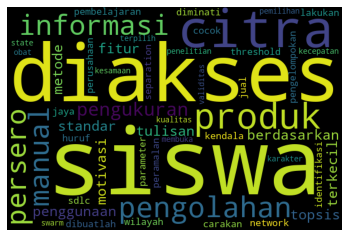

In [42]:
# topic 0
draw_word_cloud(0)

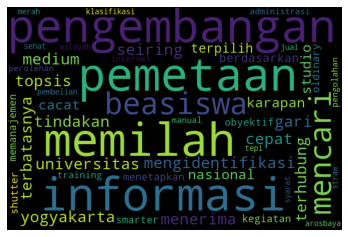

In [43]:
# topic 1
draw_word_cloud(1)  # ...